In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv('market_data.csv')

In [6]:
df.head()

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,GT10,USGG2YR,USGG3M,US0001M,GTDEM30Y,GTDEM10Y,GTDEM2Y,EONIA,GTITL30YR,GTITL10YR,GTITL2YR,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y,LUMSTRUU,LMBITR,LUACTRUU,LF98TRUU,LG30TRUU,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
0,0,1/11/2000,283.25,0.077,1388.0,157.26,100.56,105.86,1.646,25.77,22.50,6.671,6.657,6.428,5.426,5.781,6.121,5.541,4.316,2.89,6.321,5.777,4.495,2.422,1.709,0.346,4.535,4.770,6.524,870.94,474.045,990.75,546.04,305.057,116.464,230.527,123.762,1416.12,127.75,990.59,856.76,224.33,217.34,34.30
1,0,1/18/2000,287.65,0.043,1405.0,165.01,101.86,105.47,1.638,28.85,21.50,6.747,6.748,6.465,5.378,5.803,6.254,5.644,4.321,3.03,6.459,5.889,4.535,2.418,1.765,0.349,4.746,4.975,6.613,869.33,473.223,990.48,545.68,305.303,117.267,231.377,123.762,1428.79,129.50,993.98,925.22,234.37,227.08,32.74
2,0,1/25/2000,287.15,0.135,1368.0,167.24,102.41,106.04,1.650,28.28,23.02,6.634,6.692,6.432,5.562,5.819,6.045,5.515,4.270,3.15,6.281,5.760,4.511,2.259,1.625,0.293,4.691,4.900,6.521,873.50,472.723,997.68,546.70,306.181,117.995,232.390,123.762,1385.93,126.48,974.83,886.93,216.82,233.00,32.46
3,0,2/1/2000,282.75,0.191,1311.0,166.85,104.92,107.85,1.611,28.22,23.45,6.423,6.619,6.574,5.708,5.885,5.944,5.459,4.326,3.30,6.188,5.710,4.540,2.330,1.770,0.364,4.593,4.794,6.467,871.22,473.255,997.91,547.38,305.997,120.510,231.942,122.328,1385.31,129.19,1007.12,842.60,201.89,237.48,31.29
4,1,2/8/2000,298.40,0.312,1277.0,165.43,104.22,109.30,1.611,28.02,21.25,6.231,6.613,6.678,5.677,5.891,5.850,5.482,4.390,3.26,6.118,5.728,4.638,2.481,1.919,0.359,4.548,4.768,6.472,872.39,474.733,998.77,548.25,309.476,118.791,237.812,122.328,1411.95,134.67,1034.58,945.15,218.00,258.02,31.32


In [7]:
df.describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,GT10,USGG2YR,USGG3M,US0001M,GTDEM30Y,GTDEM10Y,GTDEM2Y,EONIA,GTITL30YR,GTITL10YR,GTITL2YR,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y,LUMSTRUU,LMBITR,LUACTRUU,LF98TRUU,LG30TRUU,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,0.213321,987.463744,0.036153,2259.860486,245.247670,90.934982,106.605734,1.569661,60.708101,19.992169,3.908361,3.266748,1.990379,1.575180,1.836137,3.039282,2.448365,1.431110,1.363676,4.426725,3.680791,2.104911,1.724494,0.904126,0.150180,3.450157,3.445772,2.299772,1637.293510,883.615477,2077.306949,1231.258119,804.720667,232.109985,704.379545,259.052717,1606.997102,107.877138,784.846292,1903.216436,648.681377,693.156616,53.933159
std,0.409837,494.623740,0.349453,2017.811888,68.278066,11.379095,12.840754,0.212344,25.900813,8.642157,1.178584,1.332464,1.710305,1.802895,1.909024,1.779526,1.851558,1.876061,1.721894,1.274729,1.465289,1.700726,0.720026,0.643985,0.297519,1.263211,1.366181,2.128524,417.229338,241.507115,690.731794,553.121000,370.251989,109.917628,309.951757,75.934451,698.481956,20.795973,200.076443,986.468254,299.096020,405.527014,24.738356
min,0.000000,256.680000,-0.974000,291.000000,106.293000,71.329000,75.940000,1.172000,10.010000,9.430000,1.163000,0.508000,0.107300,-0.038000,0.105750,-0.471000,-0.794000,-0.968000,-0.498000,1.386000,0.512000,-0.458000,0.056000,-0.291000,-0.351000,0.547000,0.489200,-0.163300,869.330000,472.723000,986.940000,491.080000,294.367000,80.797000,230.527000,121.331000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,0.000000,433.740000,-0.191000,990.000000,184.705550,81.240500,101.565000,1.418000,39.625000,13.640000,2.960000,2.195500,0.576000,0.090000,0.241000,1.288000,0.539000,-0.382500,-0.229500,3.395000,2.329500,0.403500,1.055000,0.253500,-0.031000,2.336000,2.185000,0.466000,1251.130000,683.896500,1509.730000,743.535000,479.388500,131.025000,434.661000,205.315500,1103.925000,90.605000,601.615000,1042.645000,463.195000,278.385000,28.565000
50%,0.000000,1137.800000,0.035000,1518.000000,234.560000,89.716000,108.720000,1.562000,57.400000,17.980000,4.100000,3.115000,1.522000,0.958000,1.214000,3.572000,2.994000,1.057000,0.437000,4.839000,4.098000,2.214000,1.944000,1.038000,0.097000,4.112000,4.114000,0.936000,1723.800000,855.517000,2045.550000,1145.150000,765.248000,213.205000,714.807000,264.770000,1324.430000,111.320000,786.830000,1860.960000,612.930000,691.530000,58.740000
75%,0.000000,1324.825000,0.260500,2685.500000,301.539500,97.404000,116.220000,1.677500,79.640000,23.625000,4.844500,4.345000,2.927500,2.335500,2.502500,4.582500,4.080000,3.121000,2.890000,5.312500,4.683500,3.523000,2.315500,1.429500,0.230000,4.486000,4.611000,4.488000,2005.330000,1099.705500,2624.980000,1663.945000,1111.224500,342.884500,939.824500,320.753000,1992.445000,126.470000,965.875000,2533.770000,793.620000,1014.750000,68.460000
max,1.000000,2006.910000,0.991000,11793.000000,467.570000,119.820000,134.630000,2.085000,140.970000,75.910000,6.747000,6.748000,6.872000,6.414000,6.776000,6.254000,5.644000,5.264000,5.730000,7.500000,7.209000,7.015000,3.128000,1.968000,1.080000,5.075000,5.242000,6.613000,2325.860000,1350.500000,3550.430000,2378.530000,1525.790000,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


In [9]:
df[df['Y'] == 0].describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,GT10,USGG2YR,USGG3M,US0001M,GTDEM30Y,GTDEM10Y,GTDEM2Y,EONIA,GTITL30YR,GTITL10YR,GTITL2YR,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y,LUMSTRUU,LMBITR,LUACTRUU,LF98TRUU,LG30TRUU,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,874.0,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000,874.000000
mean,0.0,990.433593,0.052664,2347.495423,247.881169,90.323585,107.616281,1.579962,61.653707,17.300263,3.896549,3.270061,2.021456,1.599518,1.820856,2.908183,2.313506,1.303573,1.202072,4.230992,3.453836,1.835333,1.681562,0.859324,0.132787,3.384553,3.374560,2.260985,1660.073970,901.667633,2132.510297,1285.861659,842.730654,244.111644,731.721141,265.240222,1677.502025,110.625195,813.943009,1925.515492,671.854016,733.038192,55.859222
std,0.0,472.840491,0.335677,2014.431535,66.348132,10.483254,11.547186,0.221348,24.492175,5.194502,1.141619,1.283589,1.680322,1.772110,1.874724,1.762839,1.839964,1.841740,1.649018,1.196397,1.383427,1.616141,0.746508,0.666521,0.301040,1.272939,1.370482,2.125250,412.535699,239.827768,682.030867,551.115020,368.706351,109.666432,306.805151,73.623324,699.762950,19.452209,190.909211,954.034630,286.306596,409.243710,24.792759
min,0.0,257.100000,-0.873000,291.000000,129.574000,71.329000,76.720000,1.206000,18.080000,9.430000,1.185700,0.508000,0.107300,-0.010000,0.105750,-0.204000,-0.708000,-0.919000,-0.498000,1.386000,0.512000,-0.458000,0.056000,-0.291000,-0.351000,0.598100,0.489200,-0.163300,869.330000,472.723000,990.460000,495.320000,301.362000,81.986000,230.527000,121.331000,787.160000,63.760000,443.820000,326.720000,161.560000,125.810000,13.720000
25%,0.0,448.992500,-0.173750,1019.000000,186.208000,81.486750,102.810000,1.401500,44.560000,13.120000,2.959500,2.251750,0.613000,0.093000,0.231250,1.176250,0.433000,-0.543250,-0.337250,3.259250,2.133250,0.185750,0.853500,0.085500,-0.123750,2.018000,1.946500,0.461500,1260.815000,690.375750,1517.960000,783.765000,505.618750,143.396250,457.186750,206.406000,1130.237500,94.155000,660.890000,1148.162500,493.902500,318.342500,30.380000
50%,0.0,1177.875000,0.041000,1587.000000,250.235000,89.825000,109.025000,1.574500,58.350000,16.010000,4.108000,3.068500,1.583500,1.009500,1.218000,3.330500,2.655500,0.892000,0.346000,4.587500,3.943500,1.814500,1.908500,0.931500,0.092500,3.998000,4.017000,0.857000,1738.445000,882.947500,2089.980000,1248.845000,830.660500,229.733500,733.677500,275.520000,1391.480000,113.575000,814.240000,1876.695000,626.105000,730.030000,60.735000
75%,0.0,1314.617500,0.251250,2959.250000,301.856500,96.734750,115.855000,1.742750,78.157500,20.747500,4.815000,4.318750,2.955750,2.363250,2.501500,4.467500,3.995000,2.715500,2.347500,5.104750,4.446250,2.919000,2.328250,1.443250,0.200000,4.483250,4.588000,4.470500,2036.495000,1122.158000,2722.047500,1735.510000,1154.240500,348.385250,1003.778750,323.490000,2037.430000,127.905000,977.975000,2424.240000,803.947500,1052.482500,70.410000
max,0.0,2006.910000,0.991000,11793.000000,449.490000,119.820000,134.630000,2.068000,138.740000,32.880000,6.747000,6.748000,6.788000,6.414000,6.665000,6.254000,5.644000,5.264000,5.730000,6.693000,5.889000,5.462000,3.128000,1.968000,1.080000,5.060000,5.242000,6.613000,2325.860000,1350.500000,3550.430000,2378.530000,1525.790000,431.552800,1286.353000,398.706500,4043.690000,146.390000,1210.580000,4721.360000,1617.640000,1730.510000,129.200000


In [10]:
df[df['Y'] == 1].describe()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,GT10,USGG2YR,USGG3M,US0001M,GTDEM30Y,GTDEM10Y,GTDEM2Y,EONIA,GTITL30YR,GTITL10YR,GTITL2YR,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y,LUMSTRUU,LMBITR,LUACTRUU,LF98TRUU,LG30TRUU,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.00000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,1.0,976.511646,-0.024734,1936.683544,235.535947,93.189671,102.879072,1.531673,57.220928,29.919283,3.951921,3.254532,1.875776,1.485430,1.892491,3.522743,2.945692,1.901435,1.959633,5.14854,4.517747,3.099051,1.882819,1.069346,0.214321,3.692089,3.708382,2.442812,1553.284557,817.043392,1873.730042,1029.893165,664.548814,187.850703,603.550203,236.234658,1346.991603,97.742954,677.544473,1820.982785,563.226160,546.082785,46.830295
std,0.0,568.765356,0.390920,2001.477121,74.312577,13.999697,16.265108,0.170275,30.343985,11.210110,1.307586,1.501918,1.815720,1.913381,2.033678,1.760801,1.812559,1.929802,1.852790,1.29721,1.457602,1.637352,0.587340,0.521897,0.275397,1.198533,1.320146,2.138971,424.517906,236.443387,685.865129,513.489650,341.775557,99.179127,301.127765,80.027618,630.095194,22.433593,196.878357,1096.095815,328.954032,355.435302,23.242389
min,1.0,256.680000,-0.974000,345.000000,106.293000,72.369000,75.940000,1.172000,10.010000,13.710000,1.163000,0.571000,0.130900,-0.038000,0.140500,-0.471000,-0.794000,-0.968000,-0.472000,1.57300,0.699000,-0.379000,0.312000,-0.113000,-0.251000,0.547000,0.491000,-0.105800,872.390000,474.733000,986.940000,491.080000,294.367000,80.797000,237.812000,122.002000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,1.0,317.050000,-0.289000,971.000000,173.740000,80.899000,89.870000,1.442000,29.480000,21.910000,2.980000,2.006000,0.302000,0.087000,0.257000,2.359000,1.541000,0.091000,0.326000,4.91200,4.249000,2.037000,1.812000,0.822000,0.050000,3.093000,2.856000,0.511000,1122.050000,592.882000,1240.440000,555.430000,330.486000,106.475000,278.383000,144.784000,973.590000,80.820000,504.330000,768.910000,272.040000,177.450000,25.410000
50%,1.0,901.750000,-0.013000,1366.000000,215.880000,87.581000,107.340000,1.533000,45.940000,27.050000,4.091000,3.164000,1.029000,0.283000,0.985000,3.906000,3.153000,1.470000,1.273000,5.41500,4.846000,3.448000,1.995000,1.221000,0.127000,4.261000,4.316000,1.445000,1564.440000,768.478000,1662.020000,881.000000,586.794000,150.307000,554.560000,247.689000,1193.170000,92.830000,616.170000,1711.270000,533.560000,589.570000,52.290000
75%,1.0,1601.320000,0.285000,1795.000000,297.170000,106.800000,117.280000,1.585000,86.890000,35.080000,5.184000,4.501000,2.866000,2.207000,2.506000,5.106000,4.613000,3.877000,3.615000,5.97100,5.429000,4.296000,2.275000,1.413000,0.392000,4.490000,4.679000,4.583000,1860.340000,975.957000,2303.900000,1337.600000,879.031000,239.939000,810.849000,302.006000,1351.480000,117.180000,852.730000,2807.800000,767.290000,707.360000,59.980000
max,1.0,1975.060000,0.869000,11039.000000,467.570000,119.620000,133.940000,2.085000,140.970000,75.910000,6.246000,6.613000,6.872000,6.361000,6.776000,5.900000,5.562000,5.186000,5.160000,7.50000,7.209000,7.015000,2.812000,1.919000,0.986000,5.075000,5.237000,6.472000,2321.740000,1317.256000,3478.600000,2230.010000,1436.257000,418.688000,1252.322000,387.906500,3414.210000,144.000000,1082.580000,4430.990000,1562.150000,1395.800000,104.220000


In [11]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,USGG30YR,GT10,USGG2YR,USGG3M,US0001M,GTDEM30Y,GTDEM10Y,GTDEM2Y,EONIA,GTITL30YR,GTITL10YR,GTITL2YR,GTJPY30YR,GTJPY10YR,GTJPY2YR,GTGBP30Y,GTGBP20Y,GTGBP2Y,LUMSTRUU,LMBITR,LUACTRUU,LF98TRUU,LG30TRUU,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
Y,1.000000,-0.011535,-0.090772,-0.083440,-0.074102,0.103227,-0.151197,-0.093201,-0.070141,0.598432,0.019255,-0.004776,-0.034909,-0.025935,0.015379,0.141537,0.139933,0.130607,0.180311,0.295000,0.297573,0.304528,0.114555,0.133660,0.112314,0.099777,0.100142,0.035010,-0.104897,-0.143607,-0.153544,-0.189661,-0.197232,-0.209774,-0.169475,-0.156550,-0.193928,-0.253877,-0.279399,-0.043429,-0.148848,-0.188942,-0.149581
XAU BGNL,-0.011535,1.000000,0.114798,-0.315007,0.015316,-0.428891,-0.576191,-0.422084,0.515215,-0.075873,-0.868696,-0.893317,-0.742875,-0.643295,-0.642887,-0.828390,-0.835680,-0.837306,-0.816037,-0.438149,-0.474818,-0.594534,-0.622158,-0.684303,-0.440619,-0.741511,-0.783369,-0.896144,0.922561,0.879618,0.881462,0.851359,0.861813,0.817990,0.891486,0.925465,0.625814,0.176177,0.036654,0.581667,0.339929,0.831756,0.829659
ECSURPUS,-0.090772,0.114798,1.000000,-0.102022,-0.139779,0.074835,-0.070422,-0.188233,-0.016245,-0.094127,-0.015927,-0.016744,-0.058576,-0.106247,-0.141989,-0.051631,-0.052426,-0.103871,-0.164457,-0.045534,-0.055275,-0.126404,-0.091052,-0.086513,-0.264406,-0.120088,-0.116439,-0.078089,0.071001,0.091600,0.129199,0.141863,0.131176,0.115747,0.110335,0.073268,0.192180,0.014535,0.034829,-0.014098,-0.077750,0.102198,0.115145
BDIY,-0.083440,-0.315007,-0.102022,1.000000,0.596182,-0.441793,0.062822,0.756718,0.286396,-0.045367,0.390852,0.391498,0.324485,0.316566,0.382483,0.435070,0.460335,0.511614,0.497767,0.216254,0.269495,0.418313,0.468681,0.529466,0.666506,0.452088,0.485795,0.523993,-0.363202,-0.365687,-0.375367,-0.377746,-0.365869,-0.410941,-0.350372,-0.241704,-0.300277,-0.058349,0.103124,0.337489,0.606526,-0.240799,-0.033084
CRY,-0.074102,0.015316,-0.139779,0.596182,1.000000,-0.798564,-0.412364,0.793954,0.785614,-0.190060,0.256228,0.178731,0.028815,0.043997,0.092995,0.321041,0.320875,0.277763,0.234478,0.411076,0.430051,0.401355,0.570971,0.524412,0.623228,0.478155,0.450480,0.197512,-0.190604,-0.260545,-0.274922,-0.282961,-0.248420,-0.315491,-0.218547,-0.045101,-0.458623,-0.261605,-0.235202,0.641511,0.761661,-0.210901,-0.031605
DXY,0.103227,-0.428891,0.074835,-0.441793,-0.798564,1.000000,0.650429,-0.544966,-0.816378,0.115712,0.187296,0.274784,0.387242,0.351606,0.307930,0.087873,0.102974,0.192595,0.245495,-0.100070,-0.086766,0.034774,-0.176492,-0.133376,-0.318889,-0.098475,-0.056631,0.264384,-0.261856,-0.174728,-0.157217,-0.120882,-0.158966,-0.074069,-0.201703,-0.386866,0.144988,0.300674,0.247446,-0.776353,-0.756141,-0.188670,-0.352379
JPY,-0.151197,-0.576191,-0.070422,0.062822,-0.412364,0.650429,1.000000,-0.008633,-0.608209,-0.134791,0.260793,0.384427,0.496548,0.455076,0.438144,0.143504,0.172881,0.321285,0.364440,-0.296316,-0.245225,-0.015348,-0.048206,0.003475,0.030774,0.025687,0.088961,0.459662,-0.302912,-0.198762,-0.200088,-0.159244,-0.180781,-0.113902,-0.225936,-0.330176,0.115772,0.392934,0.557078,-0.639573,-0.306819,-0.149469,-0.269353
GBP,-0.093201,-0.422084,-0.188233,0.756718,0.793954,-0.544966,-0.008633,1.000000,0.352787,-0.124496,0.547876,0.502849,0.338006,0.314838,0.358554,0.602251,0.613232,0.603435,0.553107,0.426671,0.472687,0.552392,0.731792,0.732133,0.763124,0.695556,0.696851,0.598820,-0.543632,-0.568331,-0.576845,-0.585356,-0.562720,-0.598572,-0.549016,-0.402361,-0.594595,-0.246342,-0.113736,0.224720,0.530964,-0.501925,-0.329350
Cl1,-0.070141,0.515215,-0.016245,0.286396,0.785614,-0.816378,-0.608209,0.352787,1.000000,-0.213999,-0.194274,-0.268299,-0.346334,-0.291911,-0.247244,-0.143429,-0.158079,-0.208169,-0.226246,0.171692,0.158882,0.021452,0.130170,0.041538,0.261732,0.019102,-0.027489,-0.324135,0.324734,0.243818,0.228943,0.233435,0.268926,0.196312,0.292426,0.438823,-0.029697,-0.062125,-0.160278,0.86

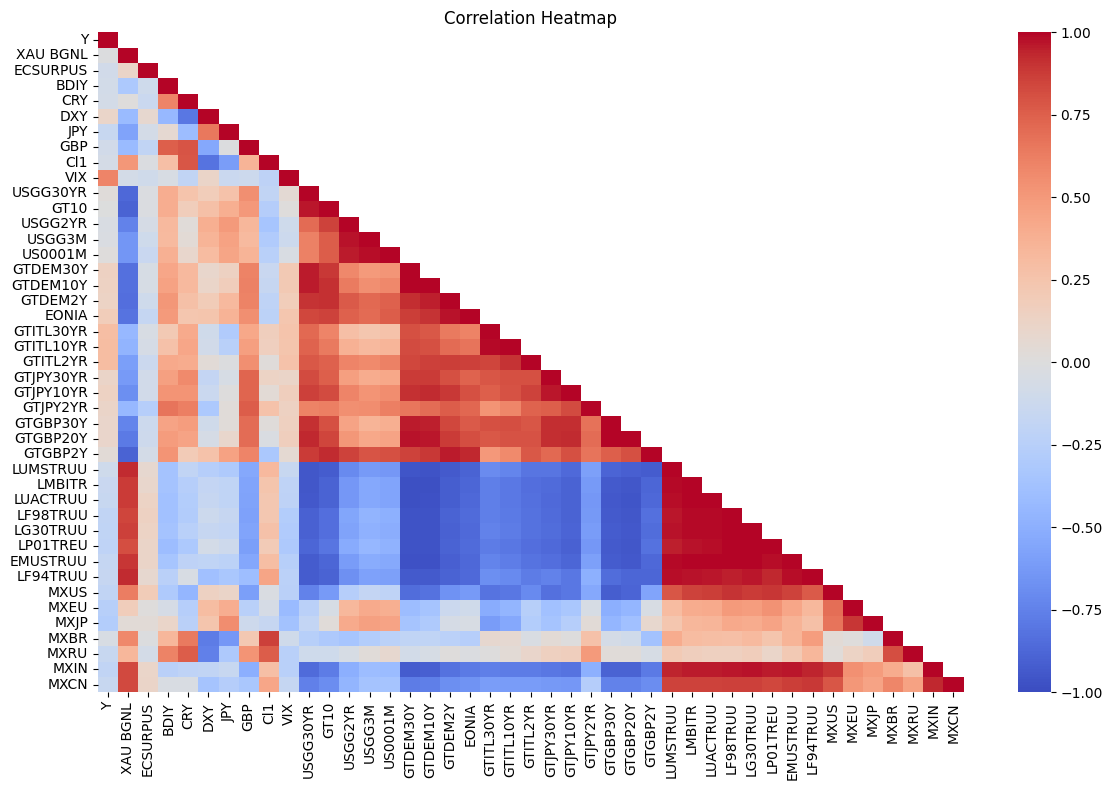

In [12]:
corr_matrix = numeric_df.corr()

upper_triangle = np.triu(corr_matrix)

mask = np.triu(np.ones_like(corr_matrix), k=1)

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix,
            mask=mask,
            annot=False,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            center=0)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [13]:
correlations = numeric_df.corr()['Y'].sort_values(ascending=False)
print("Top feature correlations with target")
print(correlations)

Top feature correlations with target
Y            1.000000
VIX          0.598432
GTITL2YR     0.304528
GTITL10YR    0.297573
GTITL30YR    0.295000
EONIA        0.180311
GTDEM30Y     0.141537
GTDEM10Y     0.139933
GTJPY10YR    0.133660
GTDEM2Y      0.130607
GTJPY30YR    0.114555
GTJPY2YR     0.112314
DXY          0.103227
GTGBP20Y     0.100142
GTGBP30Y     0.099777
GTGBP2Y      0.035010
USGG30YR     0.019255
US0001M      0.015379
GT10        -0.004776
XAU BGNL    -0.011535
USGG3M      -0.025935
USGG2YR     -0.034909
MXBR        -0.043429
Cl1         -0.070141
CRY         -0.074102
BDIY        -0.083440
ECSURPUS    -0.090772
GBP         -0.093201
LUMSTRUU    -0.104897
LMBITR      -0.143607
MXRU        -0.148848
MXCN        -0.149581
JPY         -0.151197
LUACTRUU    -0.153544
LF94TRUU    -0.156550
EMUSTRUU    -0.169475
MXIN        -0.188942
LF98TRUU    -0.189661
MXUS        -0.193928
LG30TRUU    -0.197232
LP01TREU    -0.209774
MXEU        -0.253877
MXJP        -0.279399
Name: Y, dtype: f

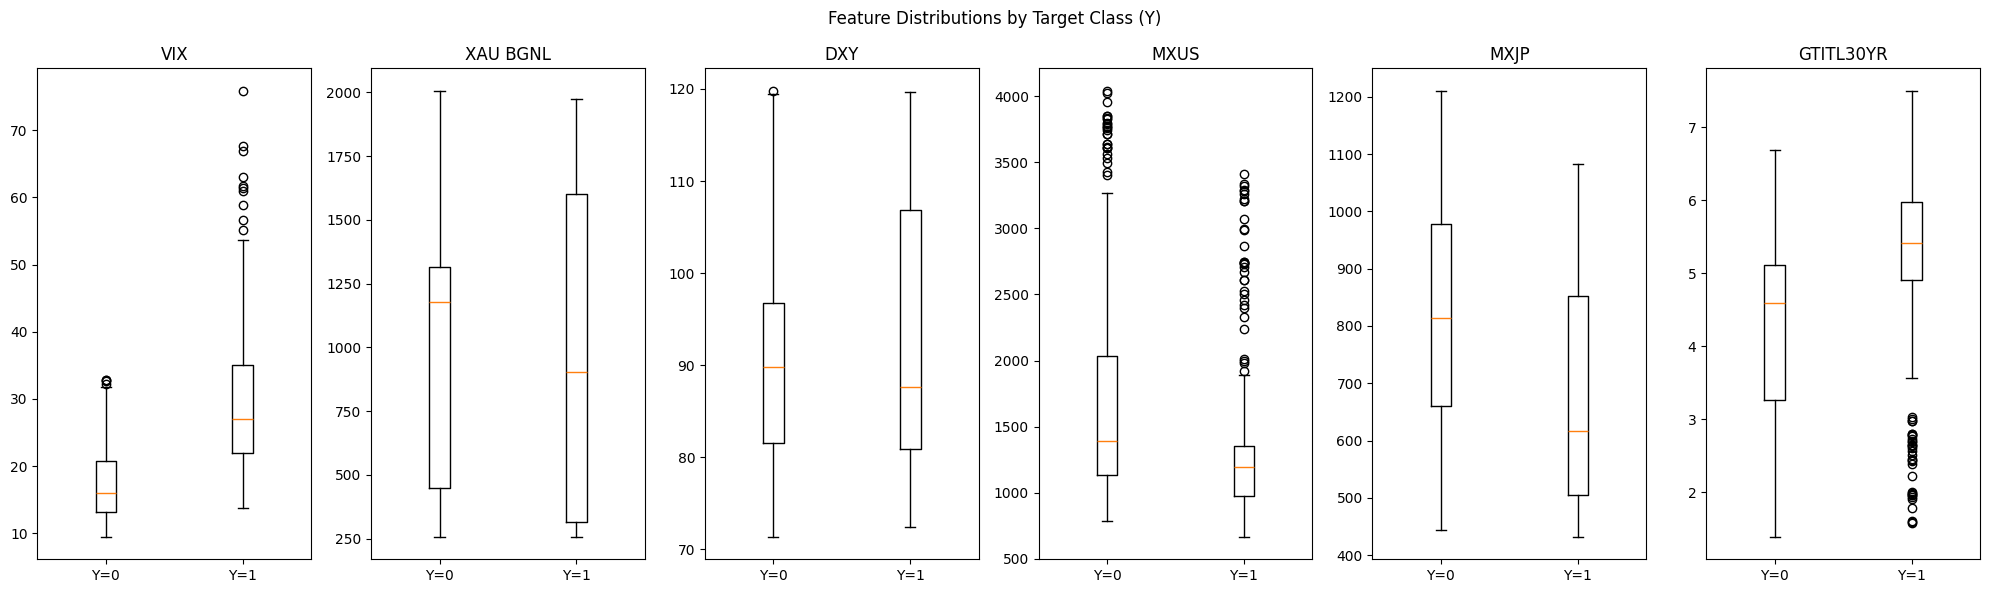

In [15]:
cols_to_plot = ["VIX", "XAU BGNL", "DXY", "MXUS", "MXJP", "GTITL30YR"]

fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))
fig.suptitle('Feature Distributions by Target Class (Y)')

for i, col in enumerate(cols_to_plot):
    data = [df[df['Y'] == 0][col], df[df['Y'] == 1][col]]
    axes[i].boxplot(data, tick_labels=['Y=0', 'Y=1'])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

<Figure size 2000x600 with 0 Axes>

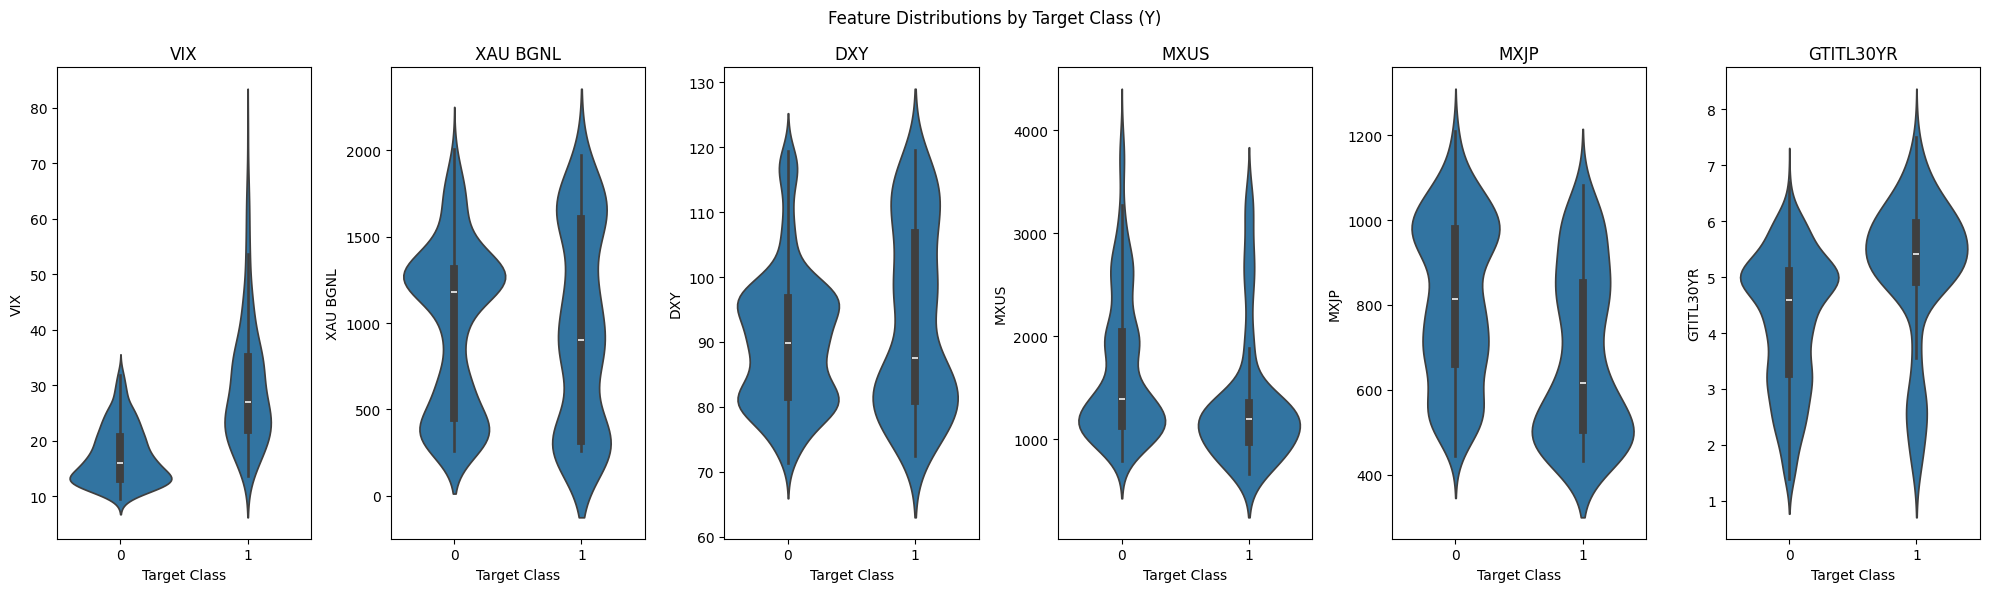

In [16]:
plt.figure(figsize=(20, 6))

fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))
fig.suptitle('Feature Distributions by Target Class (Y)')

for i, col in enumerate(cols_to_plot):
  sns.violinplot(
    data=df,
    x='Y',
    y=col,
    ax=axes[i],
    inner='box'
  )

  axes[i].set_title(col)
  axes[i].set_xlabel('Target Class')

plt.tight_layout()
plt.show()

<Figure size 2000x600 with 0 Axes>

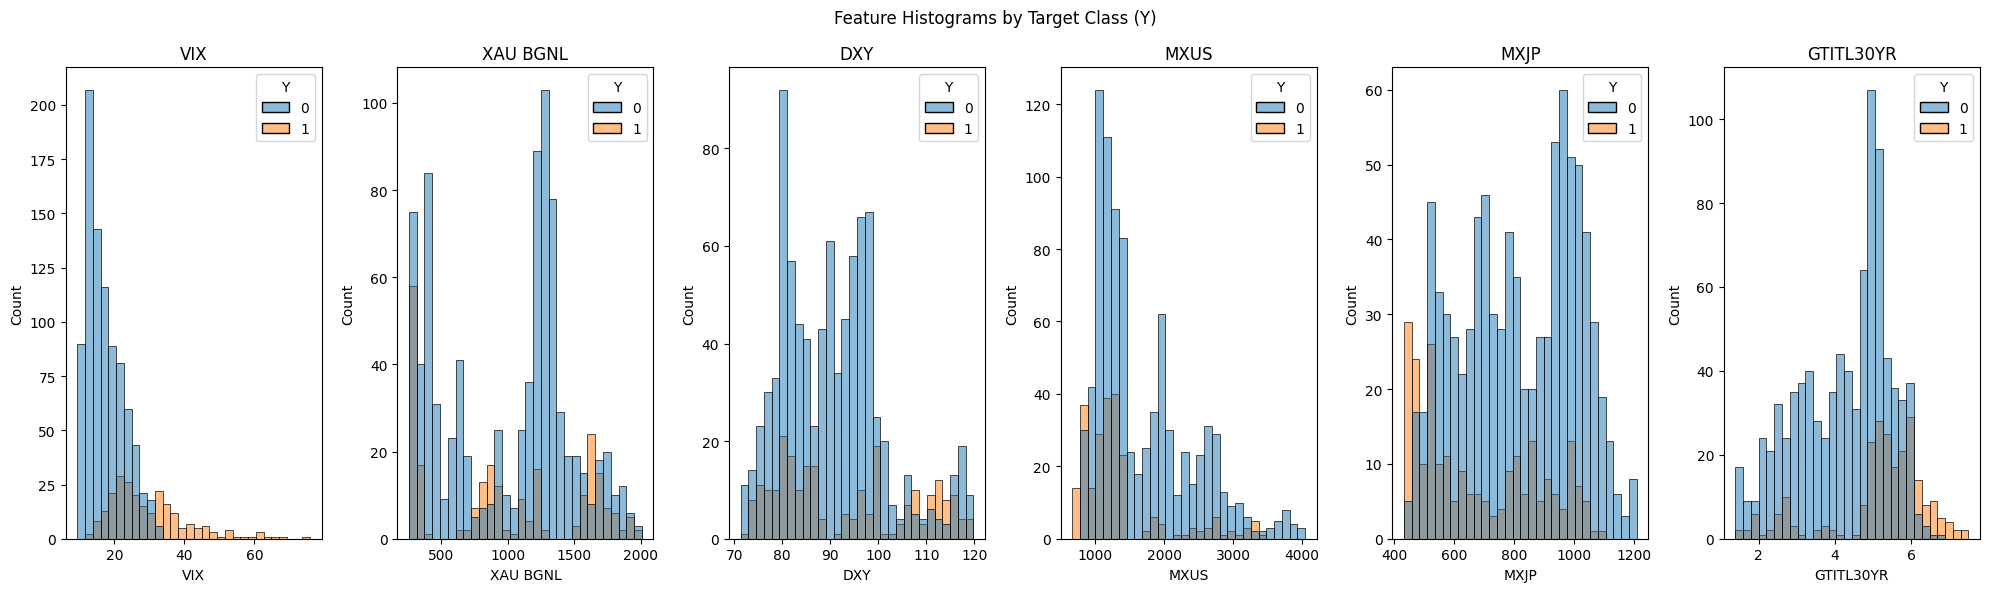

In [17]:
plt.figure(figsize=(20, 6))
fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(20, 6))
fig.suptitle('Feature Histograms by Target Class (Y)')

for i, col in enumerate(cols_to_plot):
  sns.histplot(
    data=df,
    x=col,
    hue='Y',
    ax=axes[i],
    multiple='layer',
    alpha=0.5,
    bins=30
  )
  axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [19]:
X = df[["VIX"]]
y = df["Y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nModel Coefficients:")
print(f"VIX coefficient: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       177
           1       0.71      0.43      0.54        46

    accuracy                           0.85       223
   macro avg       0.79      0.69      0.72       223
weighted avg       0.84      0.85      0.83       223


Model Coefficients:
VIX coefficient: 0.2327
Intercept: -6.4332


In [22]:
X = df[["VIX"]]
y = df["Y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42, max_iter=2000, C=0.5, class_weight='balanced', solver="liblinear")
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nModel Coefficients:")
print(f"VIX coefficient: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       177
           1       0.51      0.76      0.61        46

    accuracy                           0.80       223
   macro avg       0.72      0.78      0.74       223
weighted avg       0.84      0.80      0.81       223


Model Coefficients:
VIX coefficient: 0.1970
Intercept: -4.3067


In [27]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
import numpy as np

X = df[["VIX"]]

iso_forest = IsolationForest(
  n_estimators=1000,
  contamination="auto", 
  random_state=42,
  warm_start=True,
  n_jobs=-1
)

predictions = iso_forest.fit_predict(X)

y_pred = np.where(predictions == -1, 1, 0)

print("Classification Report:")
print(classification_report(y, y_pred))

anomaly_scores = iso_forest.score_samples(X)
print(f"Mean score: {np.mean(anomaly_scores):.4f}")
print(f"Min score: {np.min(anomaly_scores):.4f}")
print(f"Max score: {np.max(anomaly_scores):.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       874
           1       0.56      0.49      0.52       237

    accuracy                           0.81      1111
   macro avg       0.71      0.69      0.70      1111
weighted avg       0.80      0.81      0.80      1111

Mean score: -0.4751
Min score: -0.8199
Max score: -0.4352


In [35]:
X = df[['VIX', 'DXY']]
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(
  random_state=42,
  max_iter=1000,
  C=0.10,
  class_weight='balanced',
  solver='lbfgs',
  n_jobs=-1
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nModel Coefficients:")
print(f"VIX coefficient: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       177
           1       0.51      0.76      0.61        46

    accuracy                           0.80       223
   macro avg       0.72      0.79      0.74       223
weighted avg       0.84      0.80      0.82       223


Model Coefficients:
VIX coefficient: 0.2391
Intercept: -5.2603


              precision    recall  f1-score   support

           0       0.88      0.95      0.91       177
           1       0.73      0.48      0.58        46

    accuracy                           0.86       223
   macro avg       0.80      0.72      0.75       223
weighted avg       0.85      0.86      0.84       223



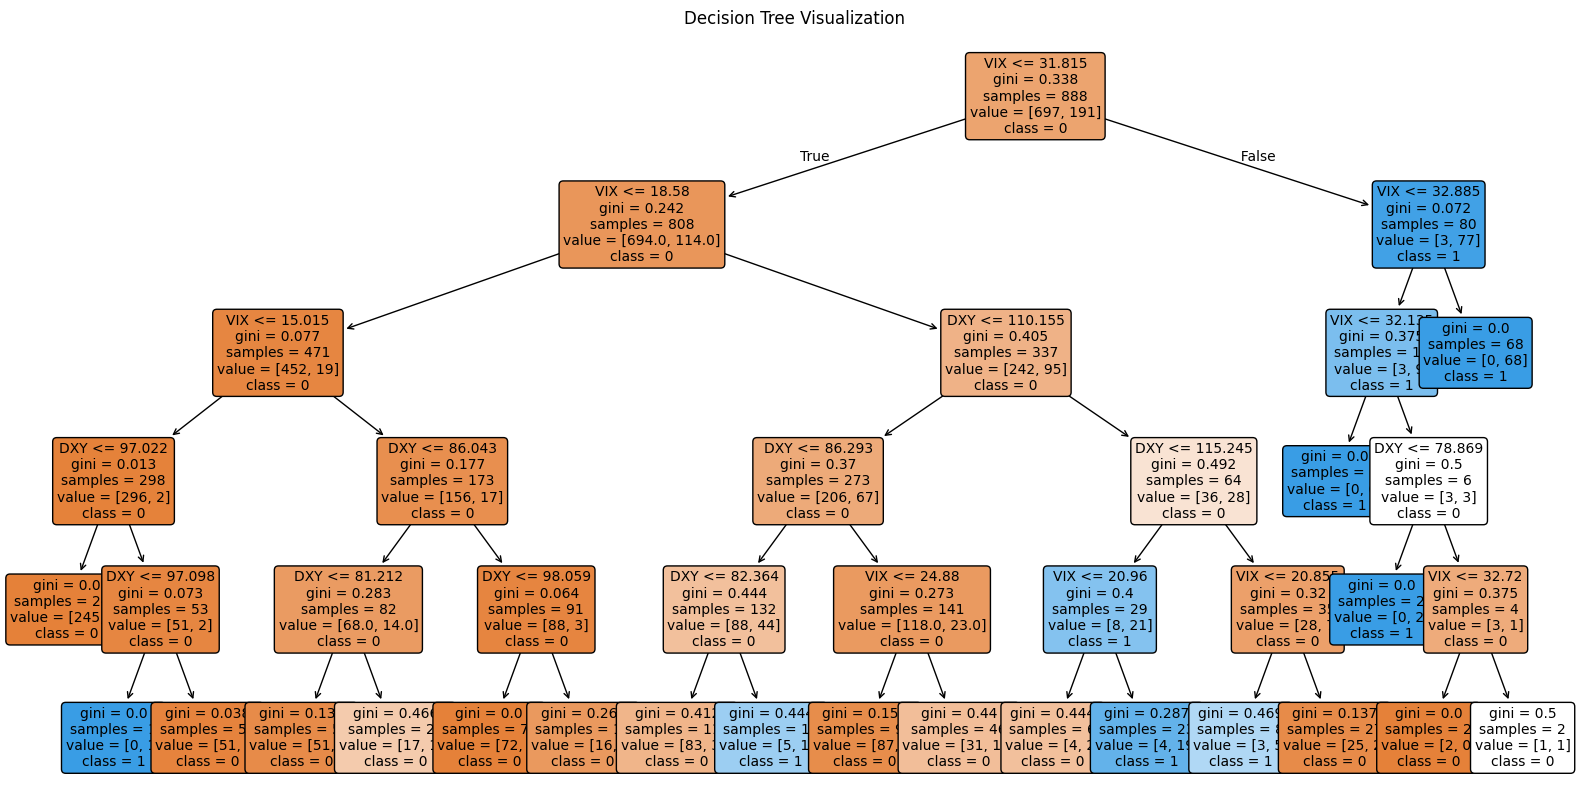

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

print(classification_report(y_test, dt.predict(X_test)))

plt.figure(figsize=(20, 10))

plot_tree(dt, feature_names=X.columns, class_names=['0', '1'], 
          filled=True, rounded=True, fontsize=10)

plt.title("Decision Tree Visualization")
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler

X = df[['VIX', 'DXY']]
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(
  random_state=42,
  max_iter=2000,
  C=0.1,
  class_weight='balanced',
  solver='liblinear',
  n_jobs=-1
)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Classifications Report with Scaled Features:")
print(classification_report(y_test, y_pred))

print("\nModel Coefficients (Scaled Features):")
print(f"VIX coefficient: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

Classifications Report with Scaled Features:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       348
           1       0.56      0.72      0.63        97

    accuracy                           0.82       445
   macro avg       0.74      0.78      0.75       445
weighted avg       0.84      0.82      0.82       445


Model Coefficients (Scaled Features):
VIX coefficient: 1.6683
Intercept: -0.3997


/Users/andycordero/Desktop/Headstarter/market-anomaly-detection/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


In [43]:
def create_financial_time_split(df, train_years=4, validation_weeks=52, test_weeks=52):
  df['Data'] = pd.to_datetime(df['Data'])
  df = df.sort_values('Data')

  train_size = train_years * 52
  total_required_size = train_size + validation_weeks + test_weeks

  if len(df) < total_required_size:
    raise ValueError("Not enough data for specified split Sizes")

  train_end = train_size
  val_end = train_end + validation_weeks  

  train_data = df.iloc[:train_end]
  validation_data = df.iloc[train_end:val_end]
  test_data = df.iloc[val_end:val_end + test_weeks]

  print(f"Training period: {train_data['Data'].min()} to {train_data['Data'].max()}")
  print(f"Validation period: {validation_data['Data'].min()} to {validation_data['Data'].max()}")
  print(f"Testing period: {test_data['Data'].min()} to {test_data['Data'].max()}")

  return train_data, validation_data, test_data

In [44]:
train_data, val_data, test_data = create_financial_time_split(df)

Training period: 2000-01-11 00:00:00 to 2003-12-30 00:00:00
Validation period: 2004-01-06 00:00:00 to 2004-12-28 00:00:00
Testing period: 2005-01-04 00:00:00 to 2005-12-27 00:00:00
